In [120]:
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [122]:
# to import stock values from the internet 
from pandas.io.data import DataReader

# for timestamps
from datetime import datetime

# SINCE WE ARE using Pyton 2
from __future__ import division

In [123]:
# EXXON vs TESLA
tech_list = ['XOM','TSLA']

In [124]:
# end date is now
end = datetime.now()
# start date is one year from now
start = datetime(end.year-2,end.month,end.day)

In [125]:
# DataReader supports yahoo finance, google finance, world bank. So by specifying yahoo, pandas is importing from Y! Finance
for stock in tech_list:
    globals()[stock] = DataReader(stock,'yahoo',start,end)

In [126]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-12-26,155.039993,158.000000,154.289993,155.500000,7129500,155.500000
2013-12-27,155.300003,155.500000,150.800003,151.119995,5460200,151.119995
2013-12-30,151.119995,154.809998,150.750000,152.440002,4467500,152.440002
2013-12-31,152.320007,153.199997,148.660004,150.429993,4262400,150.429993
2014-01-02,149.800003,152.479996,146.550003,150.100006,6188400,150.100006


In [127]:
XOM.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2013-12-26,99.419998,101.029999,99.379997,100.900002,9531200,94.863725
2013-12-27,101.239998,101.739998,100.989998,101.510002,10209000,95.437232
2013-12-30,101.529999,101.550003,100.309998,100.309998,9007900,94.309017
2013-12-31,100.489998,101.389999,100.430000,101.199997,8509600,95.145773
2014-01-02,100.599998,100.760002,99.389999,99.750000,11028100,93.782521


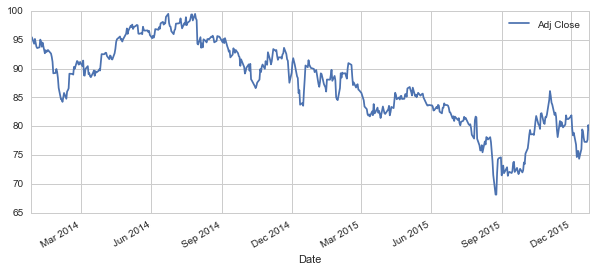

In [128]:
XOM['Adj Close'].plot(legend='True',figsize=(10,4))

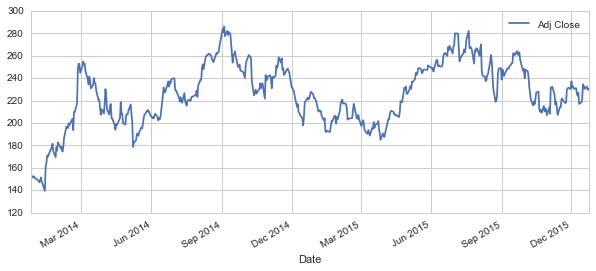

In [129]:
TSLA['Adj Close'].plot(legend='True',figsize=(10,4))

In [130]:
# Grab all the closing prices for the tech stock list into one DataFrame
tx_df = DataReader(tech_list,'yahoo',start,end)['Adj Close']

In [131]:
tx_rets = tx_df.pct_change()

In [132]:
tx_rets.head()

,TSLA,XOM
Date,,
2013-12-26,NaN,NaN
2013-12-27,-0.028167,0.006046
2013-12-30,0.008735,-0.011822
2013-12-31,-0.013186,0.008872
2014-01-02,-0.002194,-0.014328


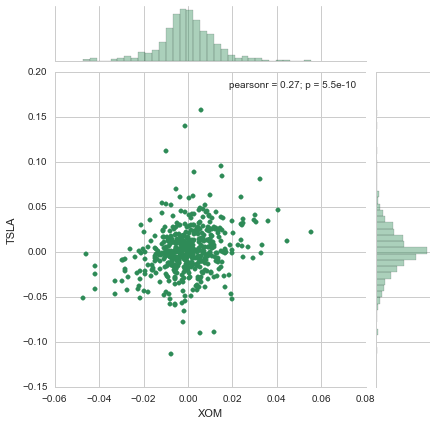

In [133]:
sns.jointplot('XOM','TSLA',tx_rets,kind='scatter',color='seagreen')

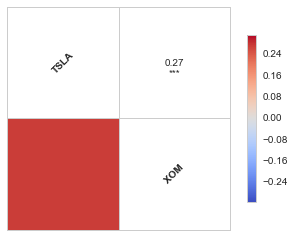

In [134]:
# Is there any correlation in daily pct returns?
sns.corrplot(tx_rets.dropna(),annot=True)

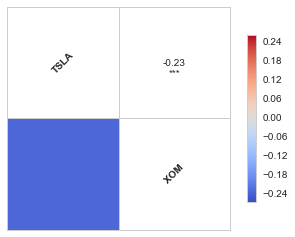

In [135]:
# Is there any correlation in closing values?
sns.corrplot(tx_df.dropna(),annot=True)

# Risk Analysis

In [136]:
rets = tx_rets.dropna()

In [137]:
rets.describe()

,TSLA,XOM
count,503.000000,503.000000
mean,0.001160,-0.000278
std,0.027618,0.012434
min,-0.113037,-0.047276
25%,-0.013462,-0.006352
50%,0.000000,-0.000591
75%,0.014553,0.006342
max,0.157385,0.055159


# Daily Returns 

In [138]:
# We'll use pct_change to find the percent change for each day
XOM['Daily Return'] = XOM['Adj Close'].pct_change()# We'll use pct_change to find the percent change for each day
TSLA['Daily Return'] = TSLA['Adj Close'].pct_change()


# VALUE RISK

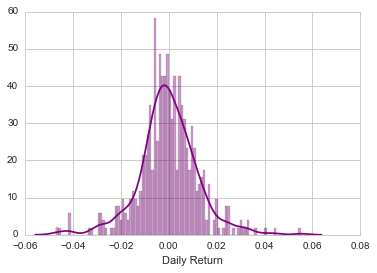

In [139]:
sns.distplot(XOM['Daily Return'].dropna(),bins=100,color='purple')

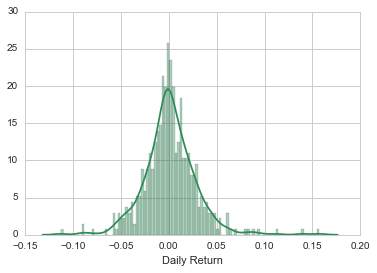

In [140]:
sns.distplot(TSLA['Daily Return'].dropna(),bins=100,color='SEAGREEN')

# Using Quantiles to get Risk values

In [141]:
# 99% of the time you will lose 3.2% ona daily basis
rets['XOM'].quantile(0.01)

-0.032979866717392357

In [142]:
rets['TSLA'].quantile(0.01)

-0.058722599920798021

# Risk using Monte Carlo Simulations

In [143]:
days = 720
dt = 1/days
mu_XOM = rets.mean()['XOM'] #average retunrs, associated with drift
sigma_XOM = rets.std()['XOM'] #volatility of the stock 

mu_TSLA = rets.mean()['TSLA'] #average retunrs, associated with drift
sigma_TSLA = rets.std()['TSLA'] #volatility of the stock 

In [144]:
def stock_monte_carlo(start_price, days,mu,sigma):
    price = np.zeros(days) # array
    shock = np.zeros(days)  # another array
    drift = np.zeros(days)
    
    
    price[0]=start_price
    
    for x in xrange(1,days):
        shock[x] = np.random.normal(loc=mu*dt,scale = sigma*np.sqrt(dt)) # for every day, grab from normal distributionGOOG
        drift[x] = mu * dt
        price[x] = price[x-1] + (price[x-1]*(drift[x]+shock[x]) )
    return price    

In [145]:
TSLA.head()

,Open,High,Low,Close,Volume,Adj Close,Daily Return
Date,,,,,,,
2013-12-26,155.039993,158.000000,154.289993,155.500000,7129500,155.500000,NaN
2013-12-27,155.300003,155.500000,150.800003,151.119995,5460200,151.119995,-0.028167
2013-12-30,151.119995,154.809998,150.750000,152.440002,4467500,152.440002,0.008735
2013-12-31,152.320007,153.199997,148.660004,150.429993,4262400,150.429993,-0.013186
2014-01-02,149.800003,152.479996,146.550003,150.100006,6188400,150.100006,-0.002194


In [146]:
XOM_start_price = 99.41
TSLA_start_price = 155.03

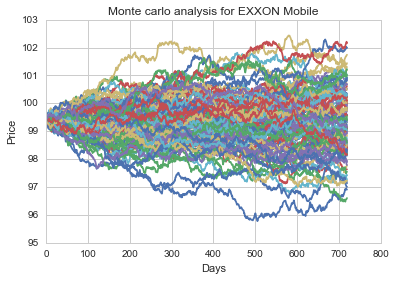

In [147]:
# Running monte carlo 100 times
for run in xrange(100):
    plt.plot(stock_monte_carlo(XOM_start_price,days,mu_XOM,sigma_XOM))
    
plt.xlabel('Days')
plt.ylabel('Price')
plt.title('Monte carlo analysis for EXXON Mobile')

In [148]:
runs = 20000
xom_runs = runs
xom_simulations = np.zeros(xom_runs)

for run in xrange(xom_runs):
    xom_simulations[run] = stock_monte_carlo(XOM_start_price,days,mu_XOM,sigma_XOM)[days-1]
   

In [149]:
tsla_days=720
tsla_runs =runs
tsla_simulations = np.zeros(tsla_runs)
for trun in xrange(tsla_runs):
    tsla_simulations[trun] = stock_monte_carlo(TSLA_start_price,tsla_days,mu_TSLA,sigma_TSLA)[tsla_days-1]

In [150]:

def plot_figure(name,start_price,mean,q,days,simulations):# 1 percentile quantile, 99% of values should fit 
    #q = np.percentile(simulations,1)
    plt.hist(simulations, bins=400)

    #Starting price
    plt.figtext(0.6,0.8, s= "Start price: $%.2f" %start_price)

    #Mean ending price
    plt.figtext(0.6,0.7,"Mean final price: $%.2f" %mean)# Variance of the price (within 99% confidence interval)
    plt.figtext(0.6, 0.6, "VaR(0.99): $%.2f" % (start_price - q,))

    # Display 1% quantile
    plt.figtext(0.15, 0.6, "q(0.99): $%.2f" % q)

    # Plot a line at the 1% quantile result
    plt.axvline(x=q, linewidth=4, color='r')

    # Titleplt.title(u"Final price distribution for %s Stock after %s days" % name,% days, weight='bold');
    plt.title(u"Final price distribution for %s Stock after %s days" % (name, days), weight='bold');

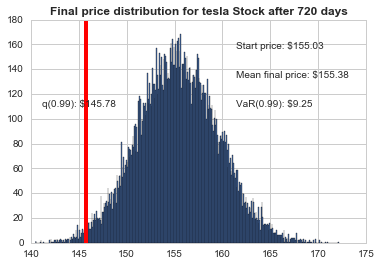

In [151]:
tsla_q = np.percentile(tsla_simulations,1)
plot_figure('tesla',TSLA_start_price,tsla_simulations.mean(),tsla_q,tsla_days,tsla_simulations)

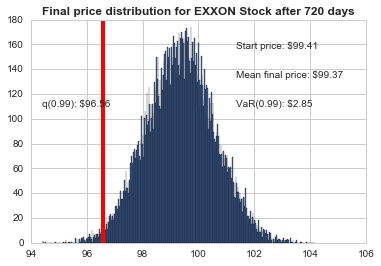

In [152]:
xom_q = np.percentile(xom_simulations,1)
plot_figure('EXXON',XOM_start_price,xom_simulations.mean(),xom_q,days,xom_simulations)